## Deep Neural Network - Base Pytorch Model - FMNIST Dataset

# [Link to my Youtube Video Explaining this whole Notebook](https://youtu.be/D0MWQ8J8lZc?list=PLxqBkZuBynVRyOJs4RWmB_fKlOVe5S8CR)

[![Imgur](https://imgur.com/00vsGks.png)](https://youtu.be/D0MWQ8J8lZc?list=PLxqBkZuBynVRyOJs4RWmB_fKlOVe5S8CR)


Fashion-MNIST dataset consists of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. 

It is a more challenging classification problem than MNIST and top results are achieved by deep learning convolutional neural networks with a classification accuracy of about 90% to 95% on the hold out test dataset.

We know that the images are all pre-segmented (e.g. each image contains a single item of clothing), that the images all have the same square size of 28×28 pixels, and that the images are grayscale. We also know that there are 10 classes and that classes are represented as unique integers.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision import datasets
import matplotlib.pyplot as plt
from torchvision import transforms
import numpy as np

# Configuration of CUDA (GPU support for PyTorch) that can be used while loading the data.
# And later to my __getitem__ function I will pass this device variable
# device = "cuda" if torch.cuda.is_available() else "cpu"

# In my case, although I have PyTorch recognizable NVIDIA GPU and so torch.cuda.is_available()
# will return TRUE, but my GPU's computer capability is < 3.5 and so will NOT work with PyTorch
device = "cpu"

In [2]:
print(torch.__version__)
print(torchvision.__version__)

1.10.1+cu113
0.11.2+cu113


In [3]:

root_input_dataset_dir = './input_dataset'

fmnist = torchvision.datasets.FashionMNIST(root_input_dataset_dir, download=True, train=True)
# fmnist = torchvision.root_input_dataset_dir.FashionMNIST(root_input_dataset_dir, download=True, train=True, transform=transforms.ToTensor())

The TorchVision datasets implement __len__() and __getitem__() methods, which means that in addition to getting specific elements by index, you can also get the number of samples with the len() function:

Additionally, DataLoader classes can use TorchVision Dataset objects to create automatic batches for training.


#### Below cell code will work when NOT using `transform=transforms.ToTensor()` with `torchvision.datasets` function

In [4]:
fmnist[10]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F5F04358340>, 0)

img.size  (28, 28)
label  9


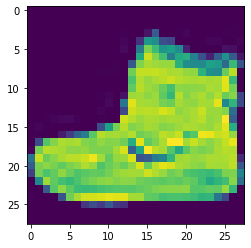

In [5]:

img, label = fmnist[0] # You’ll get a tuple with a Pillow image and an integer label back:
print("img.size ", img.size)
print("label ", label)
plt.imshow(img)

Now the `torchvision.datasets` function mostly returns Pillow images. So if you want Tensors to be returned - you do need to pass in a transform to convert the image to a tensor:

Where transform is a TorchVision transform to apply to the input image or video.

[Read more here](https://pytorch.org/vision/0.8/transforms.html)

#### PyTorch Transform and ToTensor()

This is a very commonly used conversion transform. In PyTorch, we mostly work with data in the form of tensors. If the input data is in the form of a NumPy array or PIL image, we can convert it into a tensor format using ToTensor.

The final tensor will be of the form (C * H * W). Along with this, a scaling operation is also performed from the range of 0–255 to 0–1.

In [6]:
# img1 = fmnist[10][0][0]

# plt.imshow(img1) # If I have used transform=transforms.ToTensor() while fetching with torchvision.datasets


In [7]:
# store the images and the labels
train_images = fmnist.data
train_img_targets = fmnist.targets

In [8]:
print("Train Images shape", train_images.shape)
print("train_images.size() ", train_images.size())
print("Targets.shape", train_img_targets.shape)
print("Numeric value of Unique Classes ", train_img_targets.unique())
print("Name of classes ", fmnist.classes)

Train Images shape torch.Size([60000, 28, 28])
train_images.size()  torch.Size([60000, 28, 28])
Targets.shape torch.Size([60000])
Numeric value of Unique Classes  tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Name of classes  ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Check any random single image from the train_images dataset.

torch.Size([28, 28])


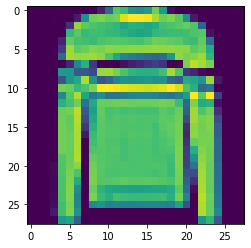

In [9]:
img = train_images[5]
print(img.size())
plt.imshow(img)

Here, we can see that there are 60,000 images each of 28 x 28 in size and with 10 possible classes across all the images. 

Note that train_img_targets contains the numeric values for each class, while `fmnist.classes` gives us the names that correspond to each numeric value in tr_targets.

---

#### Plot a random sample of 10 images for all the 10 possible classes:

#### So that in the below output plot of image -- each row represents a sample of 10 different images all belonging to the same class.


Loop through the unique class numbers (label_class) and fetch the indices of rows (label_x_rows) corresponding to the given class number:


label_x_rows  [    1     2     4 ... 59974 59985 59998]
label_x_rows  [   16    21    38 ... 59989 59991 59996]
label_x_rows  [    5     7    27 ... 59977 59981 59993]
label_x_rows  [    3    20    25 ... 59971 59980 59997]
label_x_rows  [   19    22    24 ... 59984 59986 59990]
label_x_rows  [    8     9    12 ... 59983 59995 59999]
label_x_rows  [   18    32    33 ... 59973 59987 59988]
label_x_rows  [    6    14    41 ... 59951 59979 59992]
label_x_rows  [   23    35    57 ... 59962 59967 59994]
label_x_rows  [    0    11    15 ... 59932 59970 59978]


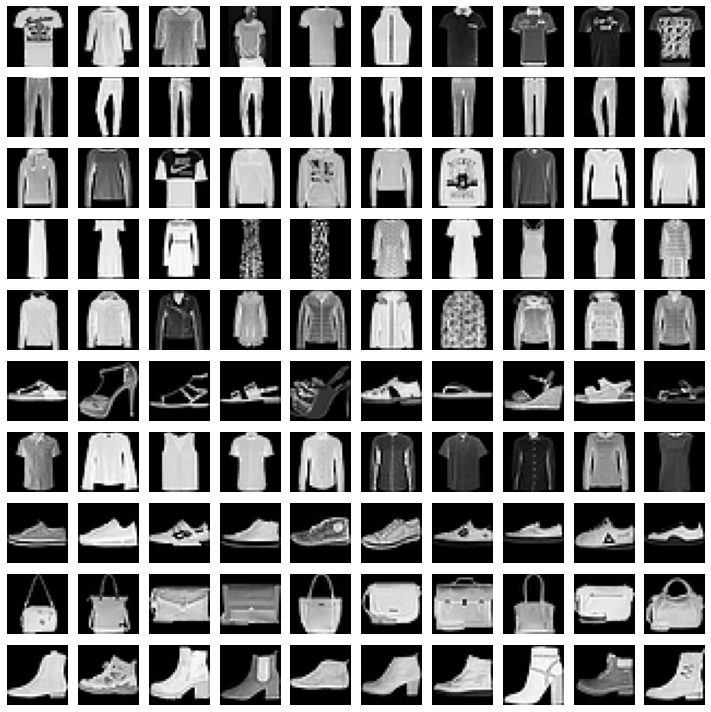

In [10]:
# Setting both row and column to be 10
row, column = len(train_img_targets.unique()), 10

fig, ax = plt.subplots(row, column, figsize=(10,10))
# ax can be either a single Axes object or an array of Axes objects if more than one subplot was created.
# here ax is a 10 by 10 tuple (10, 10) - ax.shape will give (10, 10)

for label_class, row_value in enumerate(ax):
    
    # print(row_value)
    # print('label_class ', label_class)
    # fetch the indices of rows (label_x_rows) corresponding to the given class number:        
    label_x_rows = np.where(train_img_targets == label_class)[0]    
    """     
    label_x_rows is an array of indices ( corresponding to a given class) where train_img_targets == label_class
    np.where will return me an array, and I am selecting the very first element from that.    
    Note that in the preceding code, we are fetching the 0th index as the output of the np.where condition 
    as it has a length of 1. It contains an array of all the indices where the target value (train_img_targets) is equal to label_class. """

    print('label_x_rows ', label_x_rows)    
    
    # Loop through 10 times to fill the columns of a given row. 
    for plot_cell in row_value:
        plot_cell.grid(False); plot_cell.axis('off')
        
        # label_x_rows is an array of indices ( corresponding to a given class) where train_img_targets == label_class
        # e.g. label_x_rows => [    1     2     4 ... 59974 59985 59998]
        # From that array pick a single indices for plotting
        rand_image_idx = np.random.choice(label_x_rows)
        x, y = train_images[rand_image_idx], train_images[rand_image_idx]
        plot_cell.imshow(x, cmap='gray')
plt.tight_layout()


#### In the above output plot of image -- each row represents a sample of 10 different images all belonging to the same class.

#### np.where => It outputs :

A. [ndarray or tuple of ndarrays] If both x and y are specified, the output array contains elements of x where condition is True, and elements from y elsewhere.

B. If only condition is given, which is the case here in the line `np.where(train_img_targets == label_class)`
which will return me the tuple( condition.nonzero(), the indices where condition is True ).


```py
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.where(a<4)
# => (array([0, 0, 0], dtype=int64), array([0, 1, 2], dtype=int64))

```

Note the above output is a Tuple ( condition.nonzero(), the indices where condition is True )


#### enumerate()

When you use enumerate(), the function gives you back two loop variables:

- The count of the current iteration
- The value of the item at the current iteration

---

**torch** is the main module that holds all the things you need for Tensor computation.

**`torch.nn and torch.nn.functional`** - The torch.nnmodule provides many classes and functions to build neural networks. You can think of it as the fundamental building blocks of neural networks: models, all kinds of layers, activation functions, parameter classes, etc. It allows us to build the model like putting some LEGO set together.
torch.optim

`torch.optim` offers all the optimizers like SGD, ADAM, etc., so you don’t have to write it from scratch.
torchvision

`torchvision` contains a lot of popular datasets, model architectures, and common image transformations for computer vision. We get our Fashion MNIST dataset from it and also use its transforms.

### Some basic functions in Pytorch

- `transforms.Compose` creates a series of transformation to prepare the dataset.
transforms.ToTenser convert PIL image(L, LA, P, I, F, RGB, YCbCr, RGBA, CMYK, 1) or numpy.ndarray (H x W x C) in the range [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0].

- `transform.Normalize` Normalize a tensor image with mean and standard deviation. Tensor image size should be (C x H x W) to be normalized which we already did usetransforms.ToTenser.

- `datasets.FashionMNIST` to download the Fashion MNIST datasets and transform the data. train=True if we want to get trained dataset otherwise set the parameter False for the test dataset.

- `torch.utils.data.Dataloader` takes our data train or test data with parameter batch_size and shuffle. batch_size define the how many samples per batch to load, and shuffle parameter set the True to have the data reshuffled at every epoch.

---

### Start of building the Neural Network

First building a class that fetches the dataset.

This class is derived from a Dataset class and needs three magic functions—

`__init__, __getitem__, and __len__` to always be defined:


#### torch.utils.data.Dataset

The Torch Dataset class is basically an abstract class representing the dataset. It allows us to treat the dataset as an object of a class, rather than a set of data and labels.


#### torch.utils.data.DataLoader

The Torch Dataloader not only allows us to iterate through the dataset in batches, but also gives us access to inbuilt functions for multiprocessing(allows us to load multiple batches of data in parallel, rather than loading one batch at a time), shuffling, etc.

The torch Dataloader takes a torch Dataset as input, and calls the `__getitem__()` function from the Dataset class to create a batch of data.

Read more in their [official doc](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)


### Why I need Dataset Generator Function and also another Dataloader Function

Training a deep learning model requires us to convert the data into the format that can be processed by the model. For example the model might require images with a width of 512, a height of 512, but the data we collected contains images with a width of 1280, and a height of 720. We therefore need some way to be able to convert the available data we have, into the exact format required by the model.

A dataloader in simple terms is a function that iterates through all our available data and returns it in the form of batches. For example if we have a dataset of 100 images, and we decide to batch the data with a size of 4. Our dataloader would process the data, and return 25 batches of 4 images each.

Creating a dataloader can be done in many ways, and does not require torch by any means to work. Using torch however makes the task a lot easier. Keeping that in mind, lets start by understanding what the the Torch Dataset and Dataloder Classes contains.


In [11]:
class DatasetTransformer(Dataset):
  """ Will take 2 arrays/tensors for parameters train_images (x) and train_img_targets (y) """
  def __init__(self, x, y):
    # converting the input into a floating-point number 
    # And also scale them to the range of [0,1] by dividing by 255
    x = x.float()/255
    
    #  flattened each image into 28*28 = 784 numeric values
    # where each numeric value corresponds to a pixel value
    x = x.view(-1, 28 * 28)
    self.x, self.y = x, y    
    
    
  # __getitem__ function returns a sample from the dataset given an index.
  def __getitem__(self, index):
    x, y = self.x[index], self.y[index]    
    # It is necessary to have both the model, and the data on the same device, 
    # either CPU or GPU, for the model to process data. 
    # Data on CPU and model on GPU, or vice-versa, will result in a Runtime error.
    # to(device) => this method will move the tensor or model to the specified device.
    return x.to(device), y.to(device)
    
  # __len__ function which returns the size of the dataset, 
  def __len__(self):
    return len(self.x)
  


### Why do convert numbers to float for Neural Network ?

A float is a specific data type (equivalent to a double in C/C++) which can hold non integer real numbers - for instance 8.2, 3.1415 would both be represented as floats in Python. It is called a float as in floating point number. Also 17.0 would be interpreted as a floating point value (due to the presence of the decimal point).

A floating point number is a way of representing a number with a fractional component (the part after the decimal) on a computer.

In Python, an int is a whole number, which can be positive, negative, or 0. The key though, is that an int cannot have a decimal component.

That is where float comes in handy. Say you want to save 53.95 as the result of some calculation. To keep track of that decimal, you will need to use a float.

Although it is important to note that due to the way floating point numbers are represented, you can end up with some unexpected results when working with them, such as getting 1.7000000000000002 when you just wanted 1.7

Below explanations from [this](https://ai.stackexchange.com/a/7250/49733) post for the need to convert to float() for Neural Network.

Some people might argue we can use int instead of float in NN's as float can easily be represented as anint / k where k is a multiplying factor say 10 ^ 9 e.g 0.00005 can be converted to 50000 by multiplying with 10 ^ 9..

From a purely theoretical viewpoint: This is definitely possible, but it will result in a loss of precision since int falls in the INTEGER set of number whereas floats fall in the REAL NUMBER set. Converting real numbers to int's will result in high precision loss if you are using very high precisions e.g. float64. Real numbers have an uncountable infinity, whereas integers have countable infinity and there is a well known argument called Cantor's diagonalization argument which proves this.

From a practical viewpoint: The most well known activation activation function is sigmoid activation (tanh is also very similar). The main property of these activations are they squash numbers to between 0 and 1 or -1 and 1. If you convert floating point to a integer by multiplying with a large factor, which will result in a large number almost always, and pass it to any such function the resulting output will always almost be either of the extremities (i.e 1 or 0).

### How does the "view" method work in PyTorch?

`view()` reshapes a tensor by 'stretching' or 'squeezing' its elements into the shape you specify:

![](https://i.stack.imgur.com/ORqaP.png)

The returned tensor shares the same data and must have the same number of elements, but may have a different size.


> `view(dim1,dim2,...)` returns a *view* of the same underlying information, but reshaped to a tensor of shape `dim1 x dim2 x ...` (by modifying the `shape` and `stride` attributes).

Note this implicitly assumes that the new and old dimensions have the same product (i.e. the old and new tensor have the same volume).

---


### PyTorch [-1](https://stackoverflow.com/questions/50792316/what-does-1-mean-in-pytorch-view)

`-1` is a PyTorch alias for "infer this dimension given the others have all been specified" (i.e. the quotient of the original product by the new product). It is a convention taken from [`numpy.reshape()`](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html).

Hence `t1.view(3,2)` in our example would be equivalent to `t1.view(3,-1)` or `t1.view(-1,2)`.


### Why do we flatten the data in neural networks while processing images ?

The pre-processed data should be good input to the model. It needs to be in the form of a 1-dimensional linear vector. Rectangular or cubic shapes can’t be direct inputs. And this is why we need flattening and fully-connected layers.

![Imgur](https://imgur.com/Et7tlDY.png)

A flattened one-dimensional array includes the total number of elements included in the original tensor but without the batch dimension.

Each image of Fashion MNIST has 784 elements in its multi-dimensional arrays (28 * 28). So the flattened one-dimensional array is going to have a total of 784 elements in a single one-dimensional array. By doing so we can define the number of nodes (neurons) of the input layer as well, so the input layer can take in the image data with no problem at all, into it’s each and every neuron. Hence we can define the number of neurons to be exactly 784.

#### Great explanation (of Why do we flatten ) is given in [this Quora](https://qr.ae/pG3y1D) Ans

You don’t have to flatten if you’re using a Convolutional Neural Network (CNN). But if you’re using regular “Dense” or “Linear” layers of weights, the answer is: Because you want to couple information that exists vertically as well as horizontally.

The other answers are good but seem to jump quickly to the introduction of Convolutional Neural Networks (CNN), which is relevant but doesn’t quite get at the ‘necessity’ of flatting for multilayer perceptron (MLP) architectures.

So, say you have a batch of N monochrome images which are R rows and C columns each. So your input matrix X has dimensions NxRxC. And let’s say you want to do classification, and you have M classes, so you want an output matrix Y that is NxM.

Now multiply that by an ordinary 2-dimensional “dense” weights matrix in order to get a layer of H hidden activations. Your weights will need to have dimensions CxH, and your resulting activations will have dimensions NxRxH.

[NxRxC] mmult [CxH] = [NxRxH]

Notice the “R” is still there? In fact, for ordinary matrix multiplication (and barring CNNs), without doing *something* akin to flattening, you will never get rid of the “R”. The most you can hope for is an output matrix Y that is NxRxM.

Furthermore, and more significantly, there is no way to *couple* the information *across rows* in X, without either flatting or using a 2-dimensional kernel like a convolution (or maybe some other operation we haven’t considered yet). Without doing this, you can infer information on a row-by-row basis (“horizontally”), but there’s no way to combine information that exists across rows -- it’s like you have a set of disconnected horizontal slices of an image, but no way to “see” the vertical structures, until you either flatten or switch to 2d convolution.

What other options are there besides flattening or 2d convolution? Well, presumably there are many, but these are the go-to-methods that people tend to use.

---

### PyTorch Neural Network - Why do we need getItem and len method


**`def __init__(self, x, y)`:** When you initialise the class you need to import two variables. In this case, the variables are called ‘x’ and ‘y’ to match the data which will be added.

`self.x = x & self.y = y` => The imported variables can now be used in functions within the class by using `self.x` or `self.y`.

**def __len__(self):** This function just returns the length of the x (total size of the dataset) when called. E.g., if you had a dataset with 5 images, then the integer 5 would be returned.

**`def __getitem__(self, index)`:** Returns the selected sample in the dataset by indexing. This function is used by Pytorch’s Dataset module to get a sample and construct the dataset. When initialised, it will loop through this function creating a sample from each instance in the dataset.

when the sample corresponding to a given index is called, the generator executes the __getitem__

So, the __getitem__ method contains logic for what should be returned when we ask for thee index-th data points (index will be an integer between 0 and __len__)


'index' passed in to the function is a number, this number is the data instance which Dataset will be looping through. We use the `self.y` and `self.x` variables mentioned earlier with the ‘index’ variable passed in to get the current instance of data. These current instances are then saved in variables called ‘label’ and ‘data’.

---


### How DataLoader works in PyTorch

Most of the time you wouldn’t be accessing images with indices, but rather sending matrices containing the images to your model. This comes in handy when you need to prepare data batches (and perhaps, shuffle them before every run). Now let’s see how this works in real-time. This is where DataLoader() function is of great help.

[Official Doc](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader)

Data loader. Combines a dataset and a sampler, and provides an iterable over the given dataset.

The DataLoader supports both map-style and iterable-style datasets with single- or multi-process loading, customizing loading order and optional automatic batching (collation) and memory pinning.

[Map-style datasets](https://pytorch.org/docs/stable/data.html#map-style-datasets)

**A map-style dataset** is one that implements the __getitem__() and __len__() protocols, and represents a map from (possibly non-integral) indices/keys to data samples.

So basically, this data set provides two functions  __getitem__( ), __len__( ) that returns the indices of the sample data referred to and the number of samples.

For example, such a dataset, when accessed with dataset[idx], could read the idx-th image and its corresponding label from a folder on the disk.

**Iterable-style datasets**

Datasets that can be represented in a set of iterable data samples, for this we use __iter__( )function.

An iterable-style dataset is an instance of a subclass of IterableDataset that implements the __iter__() protocol, and represents an iterable over data samples. This type of datasets is particularly suitable for cases where random reads are expensive or even improbable, and where the batch size depends on the fetched data.

For example, such a dataset, when called iter(dataset), could return a stream of data reading from a database, a remote server, or even logs generated in real time.


- **batch_size**, which denotes the number of samples contained in each generated batch.

- **shuffle**. If shuffle=True, then the batch will be different each time a call to next occurs. If set to True, we will get a new order of exploration at each pass (or just keep a linear exploration scheme otherwise). Shuffling the order in which examples are fed to the classifier is helpful so that batches between epochs do not look alike. Doing so will eventually make our model more robust.

- **num_workers**, which denotes the number of processes that generate batches in parallel. A high enough number of workers assures that CPU computations are efficiently managed, i.e. that the bottleneck is indeed the neural network's forward and backward operations on the GPU (and not data generation).


Notice that we do not need to prepare the tensors beforehand in the samples list but rather the tensors are formed only when the __getitem__ function is called, which is when the DataLoader flows the data. This makes the dataset very scalable when you have hundreds of thousands of samples to flow during training.

You can imagine how this the dataset could be used in the scenario of vision training. The dataset would have a list of filenames and the path to the directory of images leaving the __getitem__ function to only read the image files and convert them into tensors just in time for training. This can be made to run much faster by providing an appropriate number of workers to the DataLoader to process multiple image files in parallel.


**Good practice for PyTorch datasets is that you keep in mind how the dataset will scale with more and more samples and, therefore, we do not want to store too many tensors in memory at runtime in the Dataset object. Instead, we will form the tensors as we iterate through the samples list, trading off a bit of speed for memory.**


---

Create a function that generates a training DataLoader – train_dataloader from the dataset. This will sample 32 data points at random for the batch size:

In [12]:
def load_data():
  train_data = DatasetTransformer(train_images, train_img_targets)
  train_loaded_data = DataLoader(train_data, batch_size=32, shuffle=True)
  return train_loaded_data

In [13]:
# This cell's code is just for checking what kind of output 
# load_data() function is producing

# loaded_train = load_data()

# for batch_1 in loaded_train:
#   batch = batch_1
#   break

# batch[0].shape

The 32 in above is coming because I have stated `batch_size=32` in DataLoader

And the 784 is coming because, I have taken the 1 * 28 * 28 size image and flattened it to 784 inside the `__init__` function

In [14]:
from torch.optim import SGD

def run_model():
  model = nn.Sequential(
    nn.Linear(28 * 28,  1000),
    nn.ReLU(),
    nn.Linear(1000, 10)
  ).to(device)
  
  loss_fn = nn.CrossEntropyLoss()
  optimizer = SGD(model.parameters(), lr=0.01)
  return model, loss_fn, optimizer

The model is a network with one hidden layer containing 1,000 neurons.
The output is a 10-neuron layer since there are 10 possible classes.

For loss, choosing CrossEntropyLoss since the output can belong to any of the 10 classes for each image. Finally, the key aspect to note in this exercise is that we have initialized the learning rate, lr, to a value of 0.01 and not the default of 0.001 to see how the model will learn for this exercise.


### Note from [Pytorch Forum](https://discuss.pytorch.org/t/multi-class-cross-entropy-loss-and-softmax-in-pytorch/24920/4) on NOT using softmax before cross-entropy loss

First note, what softmax is trying to achieve. It outputs probability of one outcome against the other.

#### `F.softmax` should not be added before `nn.CrossEntropyLoss`. 

(In above F stands for `import torch.nn.functional as F` )

**`nn.CrossEntropyLoss` applies `F.log_softmax` and `nn.NLLLoss` internally on your input, so you should pass the raw logits to it.**

If you want to use a cross-entropy-like loss function, you shouldn’t
use a softmax layer because of the well-known problem of increased
risk of overflow.

You should either use nn.CrossEntropyLoss (which takes
pre-softmax logits, rather than post-softmax probabilities)
without a softmax-like layer, or use a nn.LogSoftmax layer,
and feed the results into nn.NLLLoss. (Both of these combine
an implicit softmax with the subsequent log in a way that avoids
the enhanced overflow problem.)

If you are stuck for some reason with your softmax layer, you
should run the probabilities output by softmax through log(),
and then feed the log-probabilities to nn.NLLLoss (but expect
increased risk of overflow).

(I am not aware of any single pytorch cross-entropy loss function
that takes post-softmax probabilities directly.)

---

### What is Logit (necessary to understand why I needed to use torch.max() function from the Prediction values )

In short - Logits is the unnormalized final scores (e.g. 15.8 or 9.7 and these kinds of numbers) of your model. You apply softmax to it to get a probability distribution over your classes. If the model is solving a multi-class classification problem, logits typically become an input to the softmax function. The softmax function then generates a vector of (normalized) probabilities with one value for each possible class.

Logit basically means:

The raw predictions which come out of the last layer of the neural network.
1. This is the very tensor on which you apply the argmax function to get the predicted class.
2.
3. This is the very tensor which you feed into the softmax function to get the probabilities for the predicted classes.


#### So overall, in context of deep learning the logits layer means the layer that feeds in to softmax (or other such normalization). The output of the softmax are the probabilities for the classification task and its input is logits layer. The logits layer typically produces values from -infinity to +infinity and the softmax layer transforms it to values from 0 to 1.

**In Math, Logit** is a function that maps probabilities ([0, 1]) to R ((-inf, inf))

**Softmax** is a function that maps [-inf, +inf] to [0, 1] similar as Sigmoid. But Softmax also normalizes the sum of the values(output vector) to be 1.

![Imgur](https://imgur.com/Plj51KC.png)


In [15]:
def trainer_each_batch(x, y, model, optimizer, loss_fn):
    model.train()
    # call model on the batch of inputs
    # `model.train()` tells your model that you are training the model. 
    # So BatchNorm layers use per-batch statistics and Dropout layers are activated etc
    # Forward pass: Compute predicted y by passing x to the model
    prediction = model(x) 
    # "prediction = model(x)" executes forward propagation over x 
    
    # compute loss
    loss_for_this_batch = loss_fn(prediction, y)
    
    # based on the forward pass in `model(x)` compute all the gradients of model.parameters()
    # loss.backward() computes dloss/dx for every parameter x which has requires_grad=True.
    # These are accumulated into x.grad for every parameter x.
    # In pseudo-code:
    # x.grad += dloss/dx
    loss_for_this_batch.backward()
    
    """ apply new-weights = f(old-weights, old-weight-gradients) where "f" is the optimizer 
    When you call `loss.backward()`, all it does is compute gradient of loss w.r.t all the parameters in loss that have `requires_grad = True` and store them in `parameter.grad` attribute for every parameter.

    `optimizer.step()` updates all the parameters based on `parameter.grad`
    """
    
    optimizer.step()
    
    # Flush gradients memory for next batch of calculations
    # `optimizer.zero_grad()` clears `x.grad` for every parameter x in the optimizer.
    # Not zeroing grads would lead to gradient accumulation across batches.
    optimizer.zero_grad()
    
    return loss_for_this_batch.item()

The trainer_each_batch function does the following this

1. Passes the batch of images through the model in the forward pass. 
3. Computes the loss on batch
4. Then passes the weights through backward propagation and updates them. 
5. Finally, it flushes the memory of the gradient so that it doesn't influence how the gradient is calculated in the next pass.


### `model.train()`

`model.train()` tells your model that you are training the model. So effectively layers like dropout, batchnorm etc. which behave different on the train and test procedures know what is going on and hence can behave accordingly.

More details:
It sets the mode to train
(see [source code][1]). You can call either `model.eval()` or `model.train(mode=False)` to tell that you are testing.
It is somewhat intuitive to expect `train` function to train model but it does not do that. It just sets the mode.


  [1]: https://pytorch.org/docs/stable/_modules/torch/nn/modules/module.html#Module.train

  So under `model.train()`

• BatchNorm layers use per-batch statistics

• Dropout layers activated etc

And under `model.eval()`

• BatchNorm layers use running statistics

• Dropout layers de-activated etc.

Equivalent to model.train(False).

---

### Understanding - The Gradient of scalar Loss function

Autograd: This class is an engine to calculate derivatives (Jacobian-vector product to be more precise). It records a graph of all the operations performed on a gradient enabled tensor and creates an acyclic graph called the dynamic computational graph. The leaves of this graph are input tensors and the roots are output tensors. Gradients are calculated by tracing the graph from the root to the leaf and multiplying every gradient in the way using the chain rule.

By PyTorch’s design, gradients can only be calculated for floating point tensors.


Now revisiting the concept of **backpropagation** - backpropagation aims to minimize the cost function by adjusting network’s weights and biases. The level of adjustment is determined by the gradients of the cost function with respect to those parameters. So in other words, **Backpropagation** is used to calculate the gradients of the loss with respect to the input weights to later update the weights and eventually reduce the loss.

![Imgur](https://imgur.com/2USXmbk.png)

When we use gradient descent as learning algorithm of our model we need to compute the gradient of the loss w.r.t the model parameters.

The loss term is usually a scalar value obtained by defining loss function (criterion) between the model prediction and and the true label — in a supervised learning problem setting — and usually we call loss.item() to get single python number out of the loss tensor.

When we start propagating the gradients backward, we start by computing the derivative of this scalar loss (L) w.r.t to the direct previous hidden layer (h) which’s a vector (group of weights) what would be the gradient in this case ?
simply it’s a Jacobian Matrix (nx1) that contains the derivative of the loss with respect to all the hidden layer variables (h1 h2 h3 … hn)

### Understanding `loss.backward()` in PyTorch

The `backward()` method is used to compute the gradient during the backward pass in a neural network.

* The gradients are computed when this method is executed.

* These gradients are stored in the respective variables.

* The gradients are computed with respect to these variables, and the gradients are accessed using .grad.

* If we do not call the backward() method for computing the gradient, the gradients are not computed.

* And, if we access the gradients using .grad, the result is None.

[Official Doc](https://pytorch.org/docs/stable/generated/torch.Tensor.backward.html#torch-tensor-backward) -

Computes the gradient of current tensor w.r.t. graph leaves.

The graph is differentiated using the chain rule. If the tensor is non-scalar (i.e. its data has more than one element) and requires gradient, the function additionally requires specifying gradient. It should be a tensor of matching type and location, that contains the gradient of the differentiated function w.r.t. self.

This function accumulates gradients in the leaves - you might need to zero .grad attributes or set them to None before calling it.

So By default, pytorch expects backward() to be called for the last output of the network - the loss function. The loss function always outputs a scalar and therefore, the gradients of the scalar loss w.r.t all other variables/parameters is well defined (using the chain rule).

Thus, by default, backward() is called on a scalar tensor and expects no arguments.

The loss function is not on its own at all! It is the final leaf in a single gigantic computational graph which starts with the model inputs and contains all model parameters. This graph is computed for each batch and results in a single scalar number on each batch.

**When we do loss.backward() the process of backpropagation starts at the loss and goes through all of its parents all the way to model inputs. All nodes in the graph contain a reference to their parent.**

### What exactly happens 'under the hood'?

[Source](https://stackoverflow.com/a/62076913/1902852)

Every operation on tensors is tracked in a computational graph if and only if one of the operands is already part of a computational graph. When you set `requires_grad=True` of a tensor, it creates a computational graph with a single vertex, the tensor itself, which will remain a leaf in the graph. Any operation with that tensor will create a new vertex, which is the result of the operation, hence there is an edge from the operands to it, tracking the operation that was performed.

```py
a = torch.tensor(2.0, requires_grad=True)
b = torch.tensor(4.0)
c = a + b # => tensor(6., grad_fn=<AddBackward0>)

a.requires_grad # => True
a.is_leaf # => True

b.requires_grad # => False
b.is_leaf # => True

c.requires_grad # => True
c.is_leaf # => False
```

[![Graph c = a + b][1]][1]

Every intermediate tensor automatically requires gradients and has a `grad_fn`, which is the function to calculate the partial derivatives with respect to its inputs. Thanks to the chain rule, we can traverse the whole graph in reverse order to calculate the derivatives with respect to every single leaf, which are the parameters we want to optimise. That's the idea of backpropagation, also known as *reverse mode differentiation*. For more details I recommend reading [Calculus on Computational Graphs: Backpropagation](https://colah.github.io/posts/2015-08-Backprop/).

#### PyTorch uses that exact idea, when you call `loss.backward()` it traverses the graph in reverse order, starting from `loss`, and calculates the derivatives for each vertex. Whenever a leaf is reached, the calculated derivative for that tensor is stored in its `.grad` attribute.

---

### What does `optimizer.step()` do

Recall that when initializing optimizer you explicitly tell it what parameters (tensors) of the model it should be updating.

The gradients are "stored" by the tensors themselves (they have a `grad` and a `requires_grad` attributes) once you call `backward()` on the loss. After computing the gradients for all tensors in the model, calling `optimizer.step()` makes the optimizer iterate over all parameters (tensors) it is supposed to update and use their internally stored grad to update their values.

```py

# Our "model"
x = torch.tensor([1., 2.], requires_grad=True)
print('original input ',x) # original input  tensor([1., 2.], requires_grad=True)
y = 100*x

# Compute loss
loss = y.sum()

# Compute gradients of the parameters w.r.t. the loss
print(x.grad)     # None
loss.backward()
print(x.grad)     # tensor([100., 100.])

# MOdify the parameters by subtracting the gradient
optim = torch.optim.SGD([x], lr=0.001)
print(x)        # tensor([1., 2.], requires_grad=True)
optim.step()
print(x)        # tensor([0.9000, 1.9000], requires_grad=True)


```


`loss.backward()` sets the `grad` attribute of all tensors with `requires_grad=True`
in the computational graph of which loss is the leaf (only `x` in this case).

Optimizer just iterates through the list of parameters (tensors) it received on initialization and everywhere where a tensor has `requires_grad=True`, it subtracts the value of its gradient stored in its `.grad` property (simply multiplied by the learning rate in case of SGD). It doesn't need to know with respect to what loss the gradients were computed it just wants to access that `.grad` property so it can do `x = x - lr * x.grad`

**Note** that if we were doing this in a train loop we would call `optim.zero_grad()` because in each train step we want to compute new gradients - we don't care about gradients from the previous batch. Not zeroing grads would lead to gradient accumulation across batches.

So again most simply - When you call `loss.backward()`, all it does is compute gradient of loss w.r.t all the parameters in loss that have `requires_grad = True` and store them in `parameter.grad` attribute for every parameter.

`optimizer.step()` updates all the parameters based on `parameter.grad`

[Source](https://stackoverflow.com/questions/53975717/pytorch-connection-between-loss-backward-and-optimizer-step)

---

### `loss.backward()`, `optimizer.step()` and `optimizer.zero_grad()`


`loss.backward()` computes dloss/dx for every parameter x which has requires_grad=True. These are accumulated into x.grad for every parameter x. In pseudo-code:

#### $$x.grad += dloss/dx$$

`optimizer.step` updates the value of x using the gradient x.grad. For example, the SGD optimizer performs:

`x += -lr * x.grad`

`optimizer.zero_grad()` clears `x.grad` for every parameter x in the optimizer.

It’s important to call this before loss.backward(), otherwise you’ll accumulate the gradients from multiple passes.

If you have multiple losses (loss1, loss2) you can sum them and then call backwards once:


```py
loss3 = loss1 + loss2
loss3.backward()

```
---

### Why do we need to call `zero_grad()` in PyTorch?

In PyTorch, for every mini-batch during the training phase, we typically want to explicitly set the gradients to zero before starting to do backpropragation (i.e., updating the Weights and biases) because PyTorch accumulates the gradients on subsequent backward passes. This accumulating behaviour is convenient while training RNNs or when we want to compute the gradient of the loss summed over multiple mini-batches. So, the default action has been set to accumulate (i.e. sum) the gradients on every loss.backward() call.

Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly. Otherwise, the gradient would be a combination of the old gradient, which you have already used to update your model parameters, and the newly-computed gradient. It would therefore point in some other direction than the intended direction towards the minimum (or maximum, in case of maximization objectives).

In [16]:
""" torch.no_grad() impacts the autograd engine and deactivate it. It will reduce memory usage and speed up computations but you won’t be able to backprop (which you don’t want in an eval script). 
So torch.no_grad() basically skips the gradient calculation over the weights. That means you are not changing any weight in the specified layers. If you are trainin pre-trained model, it's ok to use torch.no_grad() on all the layers except fully connected layer or classifier layer.

"""
@torch.no_grad()

def accuracy(x, y, model):
  
    # model.eval() will notify all your layers that you are in eval mode,
    # that way, batchnorm or dropout layers will work in eval mode instead of training mode.  
    model.eval()
    
    # get the prediction matrix for a tensor of `x` images
    prediction = model(x)
    
    # Now compute if the location of maximum in each row coincides with ground truth
    # For that firs I am identifying the argmax index corresponding to each row with prediction.max(-1)
    max_values, argmaxes = prediction.max(-1)

    """ comparing argmaxes with the ground truth through with argmaxes == y
    to check that each row is predicted correctly.  """
    
    is_correct = argmaxes == y
    
    return is_correct.cpu().numpy().tolist()


### Predicting new samples with your PyTorch model

You first have to disable grad with `torch.no_grad()` or NumPy will not work properly.

This is followed by specifying information about the item from the FMNIST dataset that you want to generate predictions for. You specify an index, load the item, and split it into an image and a true_target. Obviously, this can also be one of the images from your own dataset.

Generating a prediction is simple – you simply feed it to your model instance (here, "model" is the name of the instantiated `nn.Sequential()` module (assuming I have used `nn.Sequential` as my Model which is indeed the case for this example), and can be anything depending on how you named the variable where you initialized your neural network).

#### The prediction is a Softmax generated list of probabilities across the possible classes – and you therefore have to turn it into a predicted_class variable with np.argmax. This takes the argument with the highest value, i.e. the highest probability.

`torch.max(input, dim, keepdim=False, *, out=None)` - Returns a namedtuple (values, indices) where values is the maximum value of each row of the input tensor in the given dimension dim.
And indices is the index location of each maximum value found (argmax).

Explanation from [PyTorch Forum](https://discuss.pytorch.org/t/how-does-one-get-the-predicted-classification-label-from-a-pytorch-model/91649/2?u=david_maynard)

So, not matter what type of data you are working with, you at least have 2D tensor for input and obviously, your model in the simplest case will generate a prob/logit for each sample in each batch where in case of a single instance in a batch, it would be [1, number_of_classes].

Now, taking max() will give you value of max and index of max for each row which corresponds to each sample in each batch.

---

### Why do I use `torch.no_grad()`

[PyTorch Doc](https://pytorch.org/docs/stable/generated/torch.no_grad.html) says


Disabling gradient calculation is useful for inference, when you are sure that you will not call Tensor.backward(). It will reduce memory consumption for computations that would otherwise have requires_grad=True.

In this mode, the result of every computation will have requires_grad=False, even when the inputs have requires_grad=True.

This context manager is thread local; it will not affect computation in other threads.




`Torch.no_grad()` deactivates autograd engine. Eventually it will reduce the memory usage and speed up computations.

Use of `Torch.no_grad()`:

 - To perform inference without Gradient Calculation.

 - To make sure there's no leak test data into the model.

It's generally used to perform Validation. with torch.no_grad() you’ll have much higher speeds and can use larger validation batch sizes

#### `model.eval()` vs `torch.no_grad()`

Now DO NOT assume that using `model.eval()` would mean that I didn't need to also use `torch.no_grad()`. Turns out that both have different goals: model.eval() will ensure that layers like batchnorm or dropout will work in eval mode instead of training mode; whereas, torch.no_grad() is used for the reason specified above. Ideally, one should use both if in the evaluation phase.

So to summarize, These two have different goals:

- `model.eval()` will notify all your layers that you are in eval mode, that way, batchnorm or dropout layers will work in eval mode instead of training mode.

- `torch.no_grad()` impacts the autograd engine and deactivate it. It will reduce memory usage and speed up computations but you won’t be able to backprop (which you don’t want in an eval script).

In [17]:
training_data_loader = load_data()
model, loss_fn, optimizer = run_model()

In [18]:
losses, accuracies = [], []
for epoch in range(5):
    print(epoch)
    
    # Creating lists that will contain the accuracy and loss values corresponding to each batch within an epoch:
    losses_in_this_epoch, accuracies_in_this_epoch = [], []
    
    # Create batches of training data by iterating through the DataLoader:
    for ix, batch in enumerate(iter(training_data_loader)):
        x, y = batch
        """ Train the batch using the trainer_each_batch() function and store the loss value at
        the end of training on top of the batch as loss_for_this_batch. 
        Furthermore, store the loss values across batches in the losses_in_this_epoch list:
        """
        loss_for_this_batch = trainer_each_batch(x, y, model, optimizer, loss_fn)
        losses_in_this_epoch.append(loss_for_this_batch)
    
    # After the above loop is done 
    # store the mean loss value across all batches within an epoch:    
    epoch_loss = np.array(losses_in_this_epoch).mean()
    
    
    # Next, we calculate the accuracy of the prediction at the end of training on all batches:
    for ix, batch in enumerate(iter(training_data_loader)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        accuracies_in_this_epoch.extend(is_correct)
    epoch_accuracy = np.mean(accuracies_in_this_epoch)
    
    losses.append(epoch_loss)
    
    accuracies.append(epoch_accuracy)

0
1
2
3
4


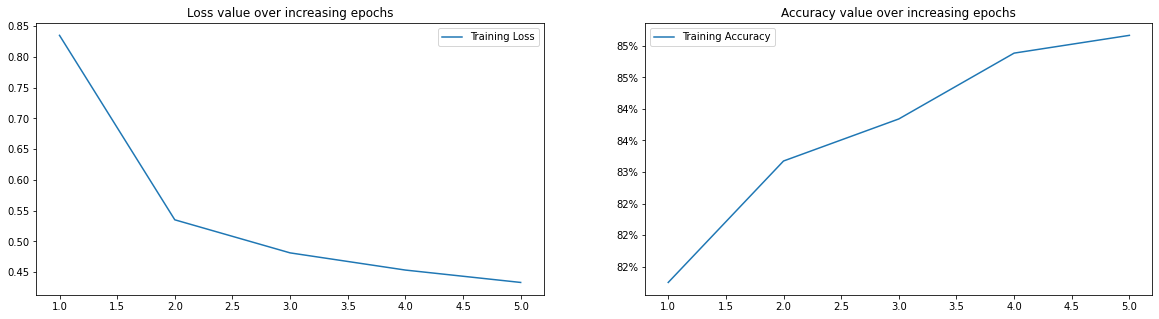

In [19]:
epochs = np.arange(5)+1
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.title('Loss value over increasing epochs')
plt.plot(epochs, losses, label='Training Loss')
plt.legend()
plt.subplot(122)
plt.title('Accuracy value over increasing epochs')
plt.plot(epochs, accuracies, label='Training Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()

### rescale

rescale —Each digital image is created by a pixel with a value between 0 and 255. 0 in black, 255 in white. So rescale the scales array of the original image pixel values to be between [0,1] which makes the images contribute more equally to the overall loss. Otherwise, higher pixel range image results in greater loss and a lower learning rate should be used, lower pixel range image would require a higher learning rate.

### Why to normalize inputs into a Neural Netwok that uses a sigmoid activation function?

Ans from [here](https://stats.stackexchange.com/a/51034/292778)

Outside the range of some input values, the derivatives of the activation functions will be close to zero. At those points, the gradient descent steps will be extremely slow due to the small weight updates.

The inputs should be scaled to the so-called "active range" of the activation function, or, in other words, the area of the function curve where the derivative of the function is clearly non-zero. This is done for backpropagation to work properly, since it uses activation function derivatives, and `~ 0` derivatives imply extremely small (insignificant) changes to NN weights (no learning). For sigmoid, the active range lies somewhere between `-sqrt(3)` and `sqrt(3)`. You may scale inputs to that range.

Also, yes: sigmoid will always output values in `(0;1)`, because that's sigmoid's range. You will need to scale NN outputs to the necessary ranges.

# [Link to my Youtube Video Explaining this whole Notebook](https://youtu.be/D0MWQ8J8lZc?list=PLxqBkZuBynVRyOJs4RWmB_fKlOVe5S8CR)

[![Imgur](https://imgur.com/00vsGks.png)](https://youtu.be/D0MWQ8J8lZc?list=PLxqBkZuBynVRyOJs4RWmB_fKlOVe5S8CR)